In [131]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("summer.csv")

In [351]:
data.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


# Summer Olympics Data Analysis Assignment

### 1. In how many cities Summer Olympics is held so far?

In [8]:
print('The number of cities summer olympics has been held so far is :' , len(data['City'].unique()))

('The number of cities summer olympics has been held so far is :', 22)


### 2. Which sport is having most number of Gold Medals so far? (Top 5)

##### UNSTACKING THE DATA BASED ON MEDALS

In [183]:
data_frame = data.groupby('Sport')['Medal'].value_counts().unstack()
data_frame.head()


Medal,Bronze,Gold,Silver
Sport,,,
Aquatics,1365.0,1421.0,1384.0
Archery,90.0,126.0,113.0
Athletics,1199.0,1215.0,1224.0
Badminton,52.0,46.0,46.0
Baseball,112.0,111.0,112.0


In [185]:
data_frame = pd.DataFrame(data_frame , columns=['Sport','Bronze','Gold','Silver'])
data_frame.head()

,Sport,Bronze,Gold,Silver
Sport,,,,
Aquatics,NaN,1365.0,1421.0,1384.0
Archery,NaN,90.0,126.0,113.0
Athletics,NaN,1199.0,1215.0,1224.0
Badminton,NaN,52.0,46.0,46.0
Baseball,NaN,112.0,111.0,112.0


In [186]:
data_frame.drop(['Sport','Bronze' , 'Silver'] , axis = 1 , inplace=True)

In [187]:
data_frame = data_frame.sort_values(by = 'Gold' , ascending = False)
data_frame.head()

,Gold
Sport,
Aquatics,1421.0
Athletics,1215.0
Rowing,890.0
Gymnastics,820.0
Fencing,552.0


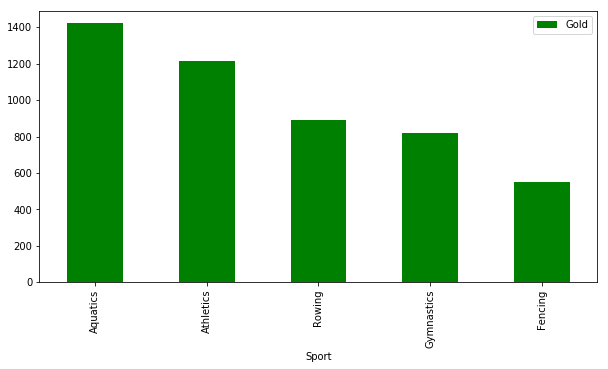

In [181]:
data_frame.plot.bar(color = 'green' , figsize=(10,5))

### 3. Which sport is having most number of medals so far? (Top 5)

In [254]:
lst = []

for sport in data['Sport'].unique():
  lst.append([sport , len(data[data['Sport']==sport])])

In [257]:
medals = pd.DataFrame(lst, columns=['Sport' , 'Number of Medals'])

In [258]:
medals.sort_values(by = 'Number of Medals' , ascending = False).head()

,Sport,Number of Medals
0,Aquatics,4170
1,Athletics,3638
17,Rowing,2667
4,Gymnastics,2307
3,Fencing,1613


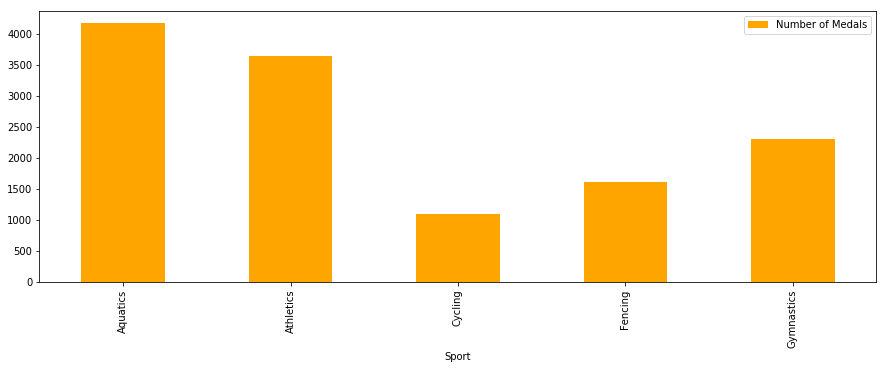

In [259]:
medals.head().plot(x='Sport' , y='Number of Medals' , color = 'orange' ,kind = 'bar' , figsize=(15,5))

### 4. Which player has won most number of medals? (Top 5)

In [264]:
lst1 = []
for name in data['Athlete'].unique():
  lst1.append([name , len(data[data['Athlete']==name])])

In [267]:
lst1 = pd.DataFrame(lst1 , columns = ['Name' , 'Medals won'])

In [268]:
lst1.sort_values(by = 'Medals won' , ascending=False).head()


,Name,Medals won
18640,"PHELPS, Michael",22
7197,"LATYNINA, Larisa",18
9948,"ANDRIANOV, Nikolay",15
6591,"ONO, Takashi",13
5103,"MANGIAROTTI, Edoardo",13


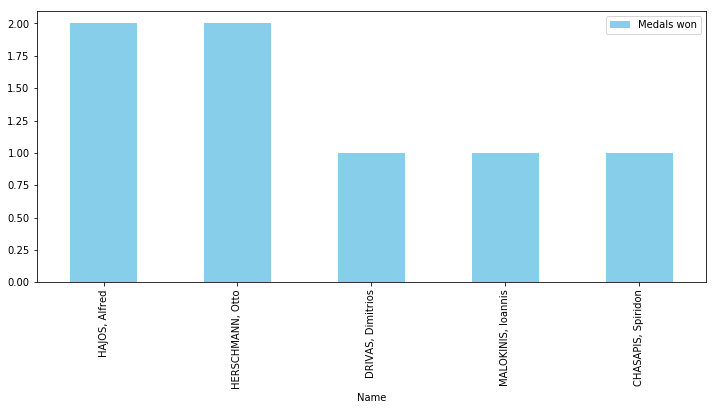

In [270]:
lst1.head().plot(x='Name' , y='Medals won' , kind= 'bar' , color='skyblue' ,  figsize = (12,5))

### 5. Which player has won most number Gold Medals of medals? (Top 5)

In [278]:
gold_medals = data.groupby('Athlete')['Medal'].value_counts().unstack().fillna(0)

In [280]:
gold_medals = pd.DataFrame(gold_medals , columns = ['Name' , 'Bronze' , 'Gold' , 'Silver'])

In [281]:
gold_medals.head()

,Name,Bronze,Gold,Silver
Athlete,,,,
"AABYE, Edgar",NaN,0.0,1.0,0.0
"AALTONEN, Arvo Ossian",NaN,2.0,0.0,0.0
"AALTONEN, Paavo Johannes",NaN,2.0,3.0,0.0
"AAMODT, Ragnhild",NaN,0.0,1.0,0.0
"AANING, Alf Lied",NaN,0.0,0.0,1.0


In [282]:
gold_medals.drop(['Name' , 'Bronze' , 'Silver'] , axis = 1 , inplace = True)

In [284]:
gold_medals = gold_medals.sort_values(by = "Gold" , ascending=False)

In [290]:
gold_medals.head()

,Gold
Athlete,
"PHELPS, Michael",18.0
"NURMI, Paavo",9.0
"LATYNINA, Larisa",9.0
"SPITZ, Mark",9.0
"LEWIS, Carl",9.0


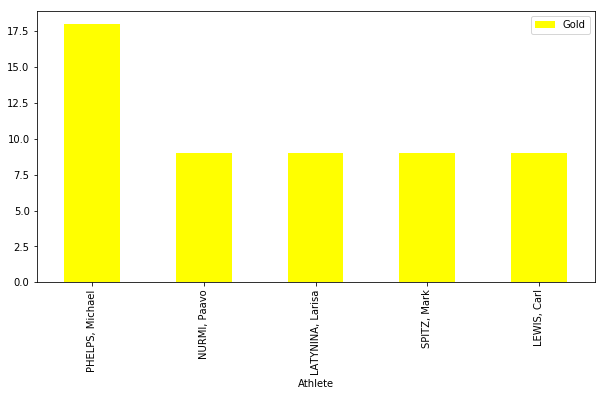

In [292]:
gold_medals.head().plot.bar(color = 'yellow' , figsize=(10,5))

### 6. In which year India won first Gold Medal in Summer Olympics?

In [310]:
ss = data[(data['Country'] == 'IND') & (data['Medal']=='Gold')]
ss.head(1)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
5512,1928,Amsterdam,Hockey,Hockey,"ALLEN, Richard James",IND,Men,Hockey,Gold


### 7. Which event is most popular in terms on number of players? (Top 5)

In [328]:
lst2 = []
for event in data['Event'].unique():
  lst2.append([event , len(data[data['Event']==event])])

In [329]:
events = pd.DataFrame(lst2 , columns = ['Event' , 'Number of Players'])

In [340]:
events = events.sort_values(by = 'Number of Players' , ascending = False).head()

In [338]:
events

,Event,Number of Players
80,Football,1497
176,Hockey,1422
138,Team Competition,1147
327,Basketball,1012
337,Handball,973


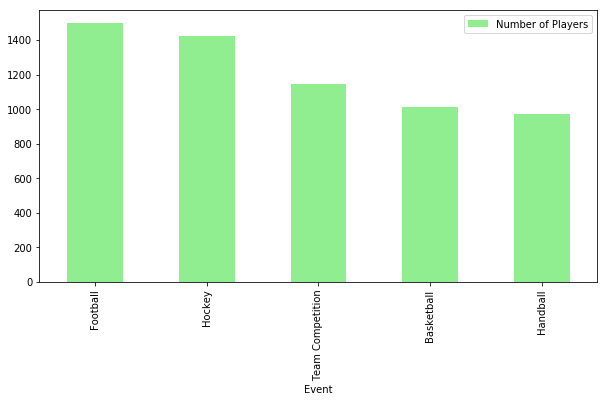

In [344]:
events.plot.bar(x='Event' , y='Number of Players',color='lightgreen' , figsize=(10,5))

### 8. Which sport is having most female Gold Medalists? (Top 5)

In [386]:
ll = data[data['Gender']=='Women']
ll.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
416,1900,Paris,Golf,Golf,"PRATT, Daria",USA,Women,Individual,Bronze
417,1900,Paris,Golf,Golf,"ABBOTT, Margaret Ives",USA,Women,Individual,Gold
418,1900,Paris,Golf,Golf,"WHITTIER, Pauline",USA,Women,Individual,Silver
639,1900,Paris,Tennis,Tennis,"JONES, Marion",ZZX,Women,Mixed Doubles,Bronze
640,1900,Paris,Tennis,Tennis,"ROSENBAUM, Hedwig",ZZX,Women,Mixed Doubles,Bronze


In [387]:
lst3 = ll.groupby('Sport')['Medal'].value_counts().unstack().fillna(0)
lst3.head()

Medal,Bronze,Gold,Silver
Sport,,,
Aquatics,562,589,575
Archery,35,39,37
Athletics,381,389,393
Badminton,26,23,23
Basketball,119,120,120


In [388]:
female_athlete = pd.DataFrame(lst3 , columns= ['Sport','Bronze' ,'Gold', 'Silver'])
female_athlete.head()

,Sport,Bronze,Gold,Silver
Sport,,,,
Aquatics,NaN,562,589,575
Archery,NaN,35,39,37
Athletics,NaN,381,389,393
Badminton,NaN,26,23,23
Basketball,NaN,119,120,120


In [389]:
female_athlete.drop(['Sport','Bronze', 'Silver'] , axis = 1 , inplace = True)

In [393]:
female_athlete = female_athlete.sort_values(by = 'Gold' , ascending = False)
female_athlete.head()

,Gold
Sport,
Aquatics,589
Athletics,389
Gymnastics,268
Rowing,217
Volleyball,166


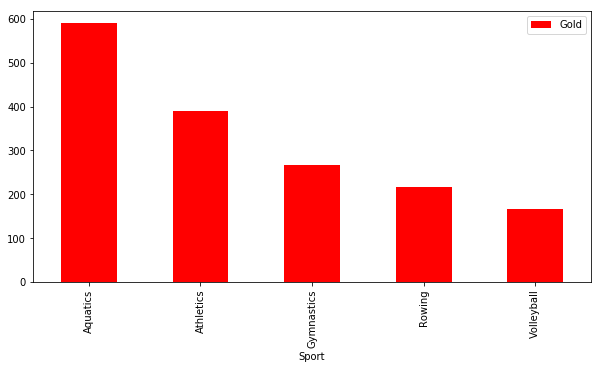

In [397]:
female_athlete.head().plot.bar(color = 'red' , figsize=(10,5))